# Import Libraries

In [4]:
!pip install pandas
!pip install scikit-learn

  Using cached scikit_learn-1.3.2-cp38-cp38-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.10.1-cp38-cp38-win_amd64.whl.metadata (58 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.3.2-cp38-cp38-win_amd64.whl (9.3 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.10.1-cp38-cp38-win_amd64.whl (42.2 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ultralytics 8.0.228 requires py-cpuinfo, which is not installed.
ultralytics 8.0.228 requires pyyaml>=5.3.1, which is not installed.
ultralytics 8.0.228 requires requests>=2.23.0, which is not installed.
ultralytics 8.0.228 requires seaborn>=0.11.0, which is not installed.
ultralytics 8.0.228 requires torch>=1.8.0, which is not installed.
ultralytics 8.0.228 requires torchvision>=0.9.0, which is not installed.
ultralytics 8.0.228 requires tqdm>=4.64.0, which is not installed.


In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load csv file

In [6]:
df=pd.read_csv("data/heart_failure_clinical_records_dataset.csv")

In [7]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Describe

In [8]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [10]:
df['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

# Split X and Y

In [11]:
x=df.drop(columns=['DEATH_EVENT'])
y=df['DEATH_EVENT']

In [12]:
print("***** Independent Values(x) *****")

print("***** Its Shape *****")
print(x.shape)

x.head()

***** Independent Values(x) *****
***** Its Shape *****
(299, 12)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [13]:
print("***** Dependent Values(y) *****")

print("***** Its Shape *****")
print(y.shape)

y.head()


***** Dependent Values(y) *****
***** Its Shape *****
(299,)


0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

# Split into Train and Test

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)

# Model Fitting

In [15]:

multipleLogisticRegressers=LogisticRegression(solver='lbfgs', max_iter=200)

"""Error found: ConvergenceWarning: lbfgs failed to converge (status=1): STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result( """
#Source for solving: https://stackoverflow.com/questions/62658215/convergencewarning-lbfgs-failed-to-converge-status-1-stop-total-no-of-iter
#My Guess: Data seems to be unpredictable. So it was difficult for our model to converge and give appropriate model for fitting.

model=multipleLogisticRegressers.fit(x_train,y_train)


In [16]:
print("***** Model Coefficients *****")
print(model.coef_)
print("*****Bias*****")
print(model.intercept_)

***** Model Coefficients *****
[[ 5.62430079e-02  1.59089113e-03  2.28745150e-04 -1.29359589e-03
  -7.57087902e-02 -5.86416416e-04 -1.33464484e-06  1.53436009e-02
   6.70645679e-03 -6.29354788e-04 -2.11697278e-03 -1.85737245e-02]]
*****Bias*****
[0.00031584]


# Predict on test data

In [17]:
#Testing on test datas
y_pred=model.predict(x_test)

print(y_pred)

[1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1]


# Evaluation Metrices

In [18]:
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score,classification_report

In [19]:
print("Model's acuracy :",accuracy_score(y_pred,y_test))
print("Recall-Score :",recall_score(y_pred,y_test))
print("Precision-Score :",precision_score(y_pred,y_test))
print("F1-Score :",f1_score(y_pred,y_test))

Model's acuracy : 0.7833333333333333
Recall-Score : 0.6428571428571429
Precision-Score : 0.5294117647058824
F1-Score : 0.5806451612903226


# Classification Report

In [16]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85        46
           1       0.53      0.64      0.58        14

    accuracy                           0.78        60
   macro avg       0.71      0.73      0.72        60
weighted avg       0.80      0.78      0.79        60



# Confusion Metrics

In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

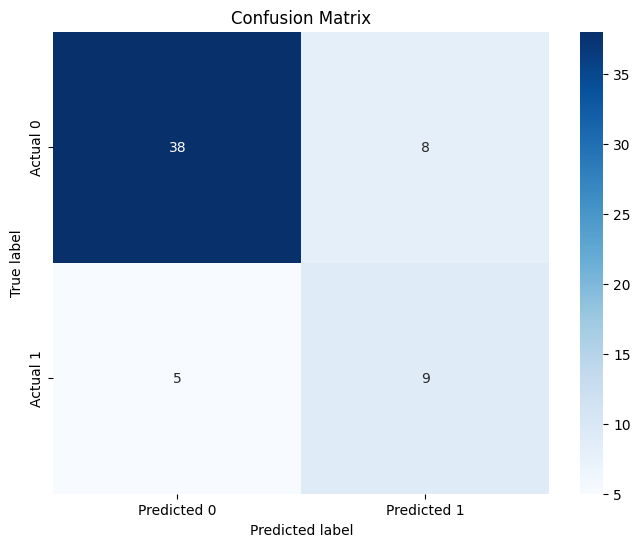

In [20]:

# Compute confusion matrix
cm = confusion_matrix(y_pred , y_test)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Assignment

<li> Try predicting on custom data </li>

In [39]:
x_test.iloc[0]

age                             65.00
anaemia                          0.00
creatinine_phosphokinase       113.00
diabetes                         1.00
ejection_fraction               25.00
high_blood_pressure              0.00
platelets                   497000.00
serum_creatinine                 1.83
serum_sodium                   135.00
sex                              1.00
smoking                          0.00
time                            67.00
Name: 69, dtype: float64